In [1]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

# Display the first few rows to understand the structure
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
# Check data types and null values
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [8]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# it implies the datasets do not have any missing values

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [10]:
# Descriptive statistics
print(customers.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [11]:
print(products.describe())

            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000


In [12]:
print(transactions.describe())

          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


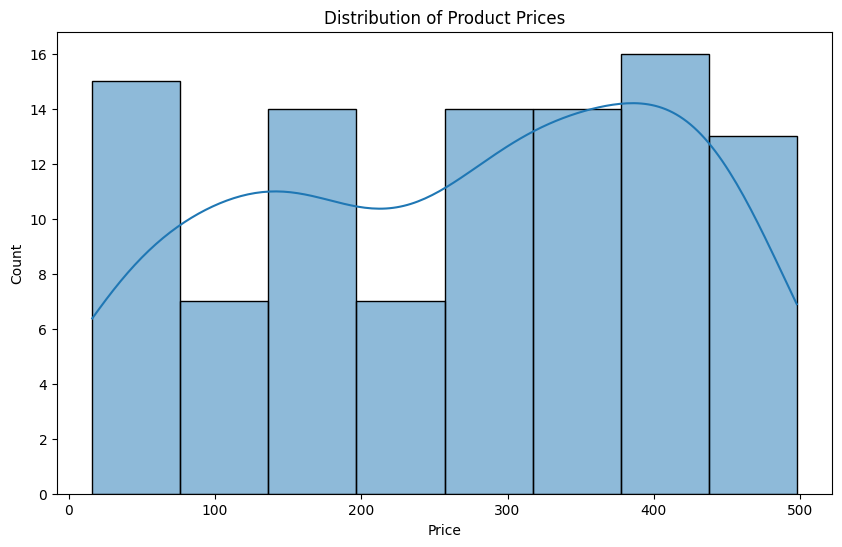

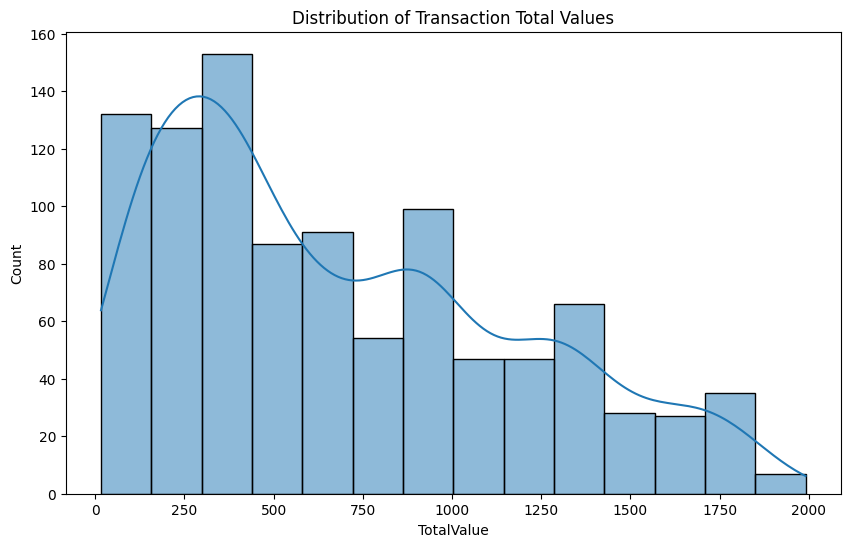

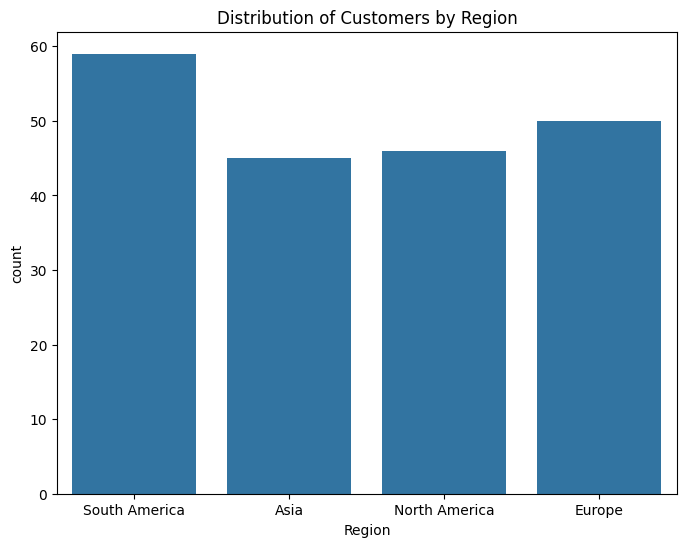

In [13]:
#visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Product Price
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.show()

# Plot the distribution of Transaction Total Value
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], kde=True)
plt.title('Distribution of Transaction Total Values')
plt.show()

# Check customer regions
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region')
plt.title('Distribution of Customers by Region')
plt.show()

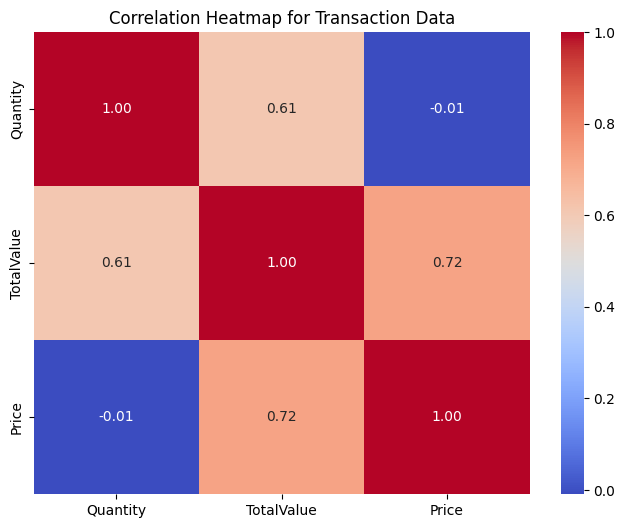

In [14]:
# Correlation plot for transaction data
corr = transactions[['Quantity', 'TotalValue', 'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Transaction Data')
plt.show()

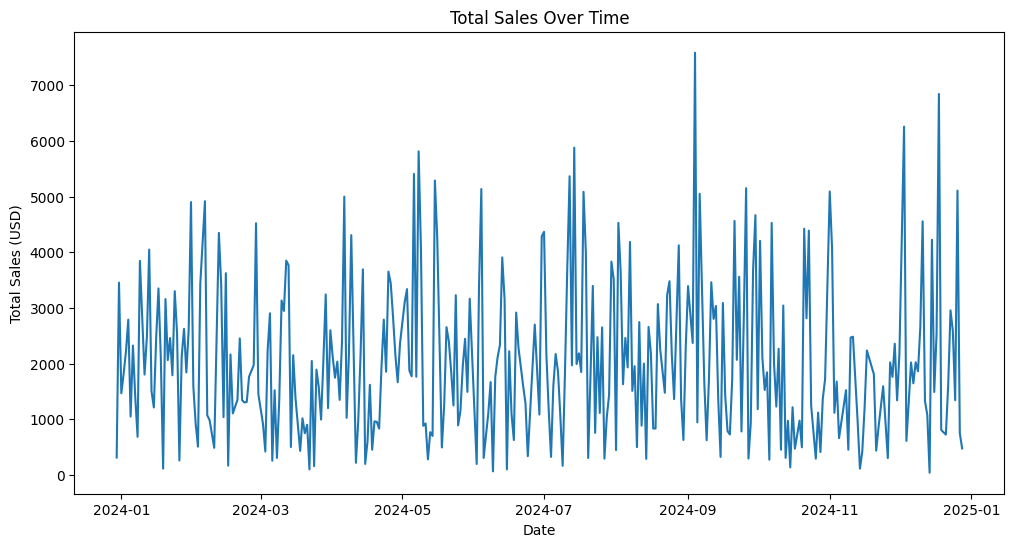

In [15]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Plot total sales over time
transactions['Date'] = transactions['TransactionDate'].dt.date
sales_over_time = transactions.groupby('Date')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (USD)')
plt.show()

<ipython-input-16-4d63fc63842e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_products['QuantitySold'] = top_products['ProductID'].map(product_sales)


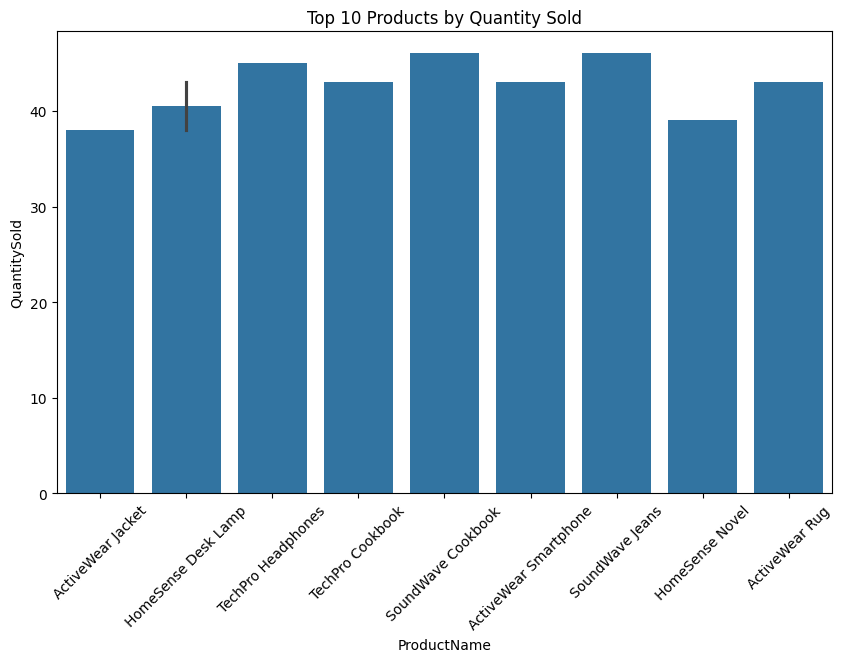

In [16]:
product_sales = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False)
top_product_ids = product_sales.head(10).index
top_products = products[products['ProductID'].isin(top_product_ids)]

top_products['QuantitySold'] = top_products['ProductID'].map(product_sales)

# Plotting the top products by quantity sold
plt.figure(figsize=(10, 6))
sns.barplot(x='ProductName', y='QuantitySold', data=top_products)
plt.title('Top 10 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Merge customer and transaction data
merged_data = pd.merge(transactions, customers, on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products, on='ProductID', how='left')

# Display merged data
print(merged_data.head())

  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x        Date     CustomerName         Region  \
0      300.68   300.68  2024-08-25   Andrea Jenkins         Europe   
1      300.68   300.68  2024-05-27  Brittany Harvey           Asia   
2      300.68   300.68  2024-04-25  Kathryn Stevens         Europe   
3      601.36   300.68  2024-03-26  Travis Campbell  South America   
4      902.04   300.68  2024-03-21    Timothy Perez         Europe   

   SignupDate                      ProductName     Category  Price_y  
0  2022-12-03  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  2024-09-04  C